In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

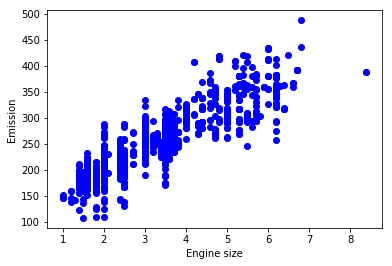

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [7]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [8]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         53.71013659 -1.95438635]]
Intercept:  [102.87749553]


Text(0,0.5,'Emission')

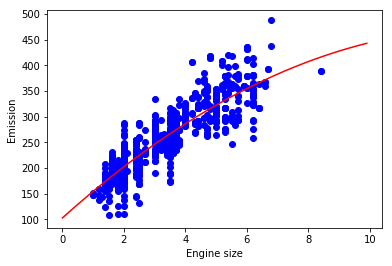

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_x_poly)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_x_poly) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_x_poly))

ValueError: shapes (194,4) and (3,1) not aligned: 4 (dim 1) != 3 (dim 0)

IndexError: index 3 is out of bounds for axis 0 with size 3

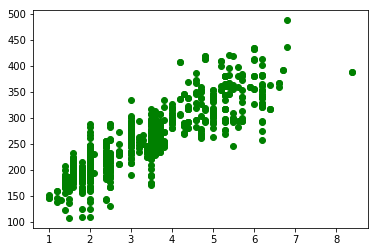

In [18]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) +  clf.coef_[0][3] * np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_x_poly)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_x_poly) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_x_poly))